# Modelo de Inteligencia Artificial para la Predicción del Riesgo de Deserción Escolar en la Educación Secundaria en un Marco Ético y Socialmente Responsable
### Autor: Lezly Jhovanna Carmona Saavedra
### Asesor: Ricardo Trujillo
### Universidad: Universidad Internacional de Valencia VIU
### Año: 2025
### Descripción:
Modelo de aprendizaje supervisado para predecir el riesgo de deserción escolar en estudiantes de secundaria, incluyendo preprocesamiento, entrenamiento y visualización de resultados.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

#### Carga de datos

In [2]:
# Cargar el dataset
df = pd.read_csv("desercion_escolar_limpio.csv")

# Codificar variables categóricas
df_encoded = df.copy()
categorical_columns = ["municipio", "institucion_educativa", "jornada_escolar", "estado_emocional"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [3]:
print(df.count())

nombre_estudiante           2820620
municipio                   2820620
institucion_educativa       2820620
grado                       2820620
promedio_notas              2820620
inasistencias               2820620
edad                        2820620
estrato_socioeconomico      2820620
repitencia                  2820620
jornada_escolar             2820620
subsidios                   2820620
estado_emocional            2820620
tasa_desercion_municipal    2820620
deserta                     2820620
dtype: int64


In [4]:
# Eliminacion de datos NAN (Se identificaron solamente 7 )
df = df.dropna().reset_index(drop=True)

In [5]:
print(df.count())

nombre_estudiante           2820620
municipio                   2820620
institucion_educativa       2820620
grado                       2820620
promedio_notas              2820620
inasistencias               2820620
edad                        2820620
estrato_socioeconomico      2820620
repitencia                  2820620
jornada_escolar             2820620
subsidios                   2820620
estado_emocional            2820620
tasa_desercion_municipal    2820620
deserta                     2820620
dtype: int64


In [6]:
# Eliminnacion de cololumnas que categoricas que no aportan al modelo (nombre_estudiante, institucion_educativa
df_final = df
df_final = df_final.drop(columns=['institucion_educativa'])

In [7]:
display(df_final)

,nombre_estudiante,municipio,grado,promedio_notas,inasistencias,edad,estrato_socioeconomico,repitencia,jornada_escolar,subsidios,estado_emocional,tasa_desercion_municipal,deserta
0,Estudiante_1,Buenaventura,Grado 10,2.08,11,14,1,0,tarde,1,bueno,5.83,1
1,Estudiante_2,Buga,Grado 11,4.08,10,14,2,0,completa,0,bueno,6.09,0
2,Estudiante_3,Palmira,Grado 9,2.25,6,14,1,0,tarde,0,bueno,3.41,1
3,Estudiante_4,Buga,Grado 10,4.73,3,17,1,0,tarde,0,malo,3.87,1
4,Estudiante_5,Buga,Grado 6,3.39,3,15,1,1,mañana,1,regular,4.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820615,Estudiante_831,Buenaventura,Grado 7,2.15,8,12,2,1,mañana,0,bueno,4.09,1
2820616,Estudiante_937,Tuluá,Grado 6,4.43,2,14,1,0,completa,1,regular,5.11,0
2820617,Estudiante_1,Buenaventura,Grado 10,2.08,11,14,1,0,tarde,1,bueno,5.83,1
2820618,Estudiante_623,Buenaventura,Grado 6,2.61,9,13,2,0,tarde,1,regular,3.31,1


In [8]:
# 1. Convertir 'grado' a número (extraer solo el número)
df_final['grado'] = df_final['grado'].str.extract('(\d+)').astype(int)

# 2. LabelEncoder para 'municipio', 'jornada_escolar', 'estado_emocional'
label_cols = ['jornada_escolar', 'estado_emocional']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_final[col] = le.fit_transform(df_final[col])
    label_encoders[col] = le  # Por si querés decodificar después

# Listo pa'l modelo
print(df_final.dtypes)

nombre_estudiante            object
municipio                    object
grado                         int64
promedio_notas              float64
inasistencias                 int64
edad                          int64
estrato_socioeconomico        int64
repitencia                    int64
jornada_escolar               int64
subsidios                     int64
estado_emocional              int64
tasa_desercion_municipal    float64
deserta                       int64
dtype: object


In [9]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Hacemos One-Hot Encoding solo para 'municipio'
import unidecode

# Normalizar nombres de municipio (quita tildes)
df_final['municipio'] = df_final['municipio'].apply(lambda x: unidecode.unidecode(x))

df_final = pd.get_dummies(df_final, columns=['municipio'], prefix='muni', drop_first=False)

# Aplicar one hot encoding para estado_emocional y jornada_escolar
# Asegurar que estén como string
df_final['estado_emocional'] = df_final['estado_emocional'].astype(str)
df_final['jornada_escolar'] = df_final['jornada_escolar'].astype(str)

# Hacer one-hot encoding
df_final = pd.get_dummies(
    df_final,
    columns=['estado_emocional', 'jornada_escolar'],
    prefix=['emo', 'jornada'],
    drop_first=False
)


# Convertir los muni_ a enteros
df_final.loc[:, df_final.columns.str.startswith('muni_')] = df_final.loc[:, df_final.columns.str.startswith('muni_')].astype(int)
df_final.loc[:, df_final.columns.str.startswith('emo_')] = df_final.loc[:, df_final.columns.str.startswith('emo_')].astype(int)
df_final.loc[:, df_final.columns.str.startswith('jornada_')] = df_final.loc[:, df_final.columns.str.startswith('jornada_')].astype(int)


/tmp/ipykernel_9167/1745545643.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 0 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_final.loc[:, df_final.columns.str.startswith('muni_')] = df_final.loc[:, df_final.columns.str.startswith('muni_')].astype(int)
/tmp/ipykernel_9167/1745545643.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_final.loc[:, df_final.columns.str.startswith('muni_')] = df_final.loc[:, df_final.columns.str.startswith('muni_')].astype(int)
/tmp/ipykernel_9167/1745545643.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, pleas

In [11]:
display(df_final)

,nombre_estudiante,grado,promedio_notas,inasistencias,edad,estrato_socioeconomico,repitencia,subsidios,tasa_desercion_municipal,deserta,...,muni_Buga,muni_Cali,muni_Palmira,muni_Tulua,emo_0,emo_1,emo_2,jornada_0,jornada_1,jornada_2
0,Estudiante_1,10,2.08,11,14,1,0,1,5.83,1,...,0,0,0,0,1,0,0,0,0,1
1,Estudiante_2,11,4.08,10,14,2,0,0,6.09,0,...,1,0,0,0,1,0,0,1,0,0
2,Estudiante_3,9,2.25,6,14,1,0,0,3.41,1,...,0,0,1,0,1,0,0,0,0,1
3,Estudiante_4,10,4.73,3,17,1,0,0,3.87,1,...,1,0,0,0,0,1,0,0,0,1
4,Estudiante_5,6,3.39,3,15,1,1,1,4.73,1,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820615,Estudiante_831,7,2.15,8,12,2,1,0,4.09,1,...,0,0,0,0,1,0,0,0,1,0
2820616,Estudiante_937,6,4.43,2,14,1,0,1,5.11,0,...,0,0,0,1,0,0,1,1,0,0
2820617,Estudiante_1,10,2.08,11,14,1,0,1,5.83,1,...,0,0,0,0,1,0,0,0,0,1
2820618,Estudiante_623,6,2.61,9,13,2,0,1,3.31,1,...,0,0,0,0,0,0,1,0,0,1


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820620 entries, 0 to 2820619
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   nombre_estudiante         object 
 1   grado                     int64  
 2   promedio_notas            float64
 3   inasistencias             int64  
 4   edad                      int64  
 5   estrato_socioeconomico    int64  
 6   repitencia                int64  
 7   subsidios                 int64  
 8   tasa_desercion_municipal  float64
 9   deserta                   int64  
 10  muni_Buenaventura         int64  
 11  muni_Buga                 int64  
 12  muni_Cali                 int64  
 13  muni_Palmira              int64  
 14  muni_Tulua                int64  
 15  emo_0                     int64  
 16  emo_1                     int64  
 17  emo_2                     int64  
 18  jornada_0                 int64  
 19  jornada_1                 int64  
 20  jornada_2               

#### Limpieza de datos

In [13]:
# Sacar la columna objetivo
target = df_final['deserta']

# Eliminarla del dataframe
df_final = df_final.drop(columns=['deserta'])

# Reinsertarla al final
df_final['deserta'] = target

In [14]:
# Eliminar filas donde la variable objetivo es NaN
df_final = df_final[df_final['deserta'].notna()].reset_index(drop=True)

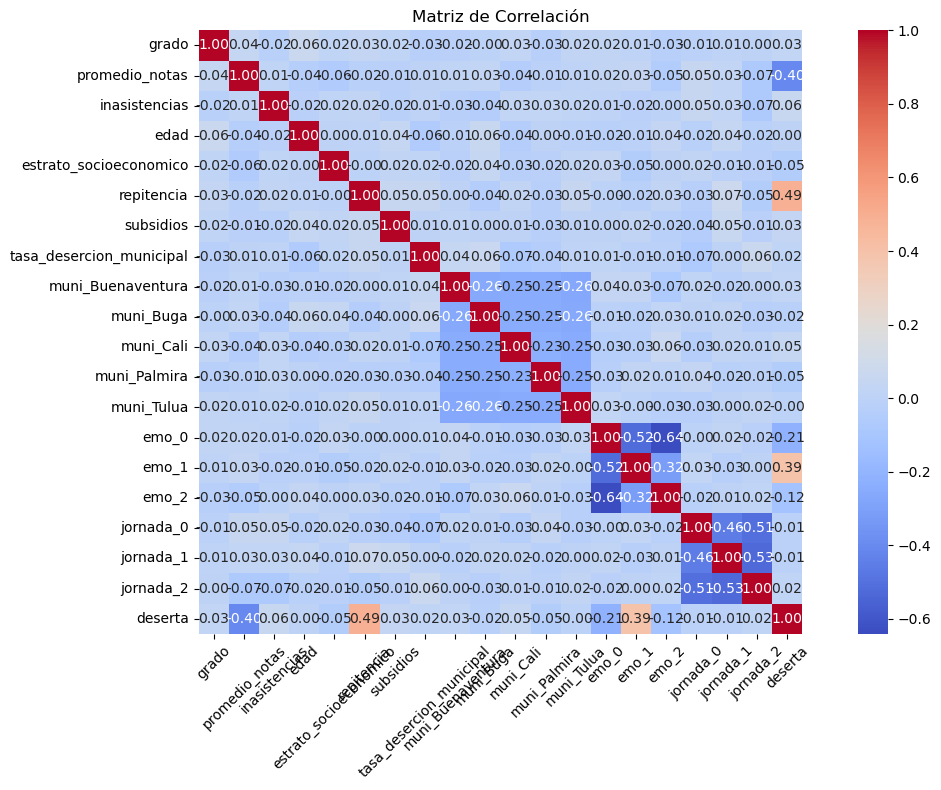

In [15]:
# Matriz de correlación
#corr_matrix = df_encoded.drop(columns=["deserta"]).corr()
# Calcular la matriz
corr = df_final.corr(numeric_only=True)

# Mostrar como mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Entrenamiento de modelo   RandomForestClassifier

In [16]:
df_reducido = df_final.drop(columns=[
    'nombre_estudiante',
    'repitencia',
    'tasa_desercion_municipal',
    'promedio_notas', 
    'estrato_socioeconomico',
    'jornada_0', 'jornada_1', 'jornada_2'
    #'emo_0', 'emo_2', 'emo_1'
])

X = df_reducido.drop(columns=['deserta'])
y = df_reducido['deserta']

In [27]:
# 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Prediccion del modelo   RandomForestClassifier

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[202666   6781]
 [  8532 346145]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    209447
           1       0.98      0.98      0.98    354677

    accuracy                           0.97    564124
   macro avg       0.97      0.97      0.97    564124
weighted avg       0.97      0.97      0.97    564124



In [33]:
y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[202666   6781]
 [  8532 346145]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    209447
           1       0.98      0.98      0.98    354677

    accuracy                           0.97    564124
   macro avg       0.97      0.97      0.97    564124
weighted avg       0.97      0.97      0.97    564124



#### Entrenamiento de modelo Multi Layer Perceptron

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(random_state=42)

#### Prediccion del modelo   Multi Layer Perceptron

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = mlp.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[196619  12828]
 [ 18616 336061]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93    209447
           1       0.96      0.95      0.96    354677

    accuracy                           0.94    564124
   macro avg       0.94      0.94      0.94    564124
weighted avg       0.94      0.94      0.94    564124



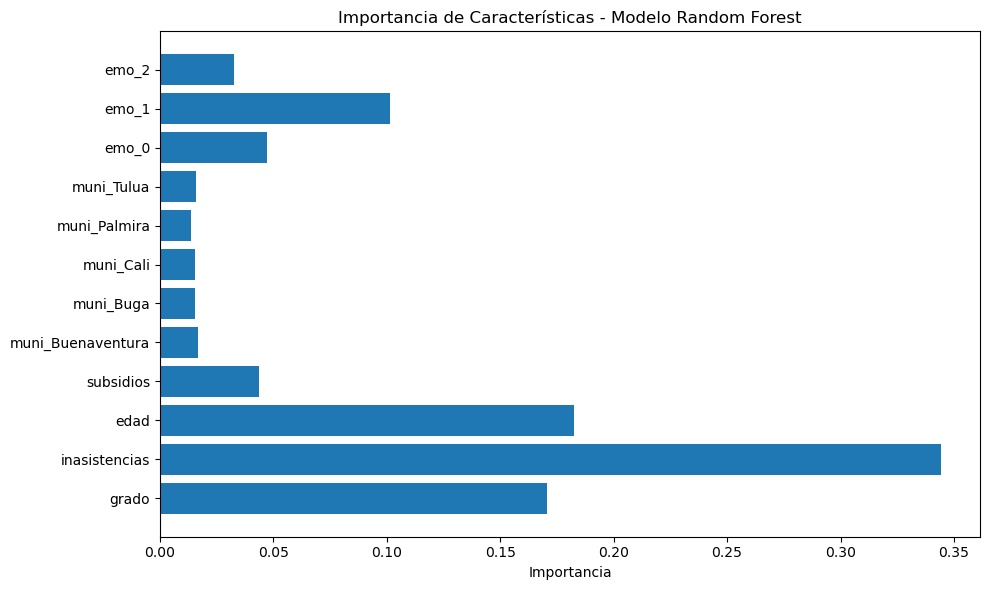

In [38]:
# Gráfico: Importancia de características
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Importancia")
plt.title("Importancia de Características - Modelo Random Forest")
plt.tight_layout()
plt.show()

----- Comparación de Modelos -----

Modelo: Random Forest
Accuracy: 0.97
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Matriz de Confusión:
[[202666   6781]
 [  8532 346145]]

Modelo: Red Neuronal (MLP)
Accuracy: 0.94
Precision: 0.96
Recall: 0.95
F1 Score: 0.96
Matriz de Confusión:
[[196619  12828]
 [ 18616 336061]]


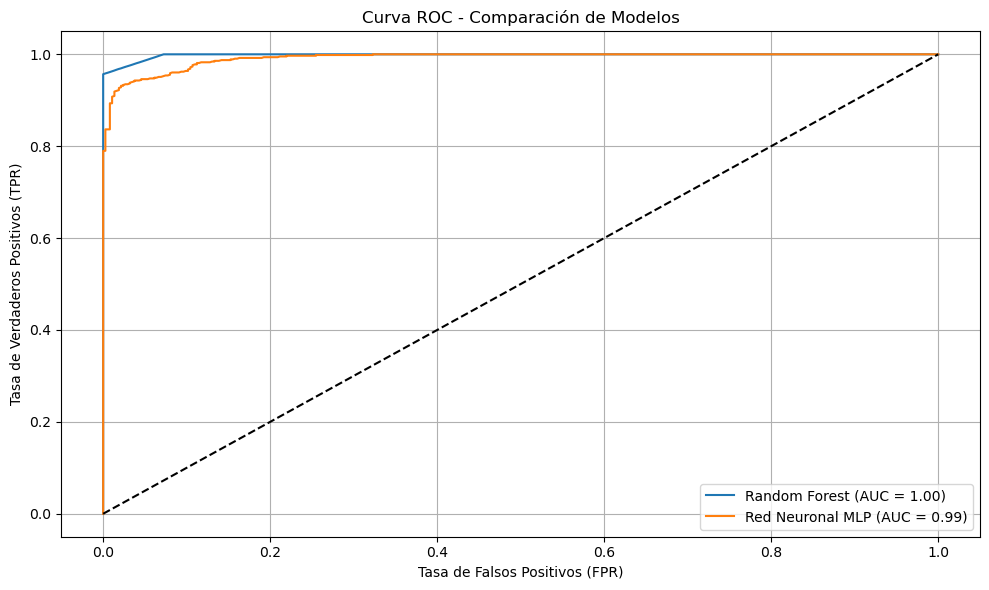

In [39]:
#Comparación de desempeño entre Random Forest y Red Neuronal (MLP), cálculo de métricas y gráfico de la curva ROC
# ====== Métricas del modelo Random Forest ======
y_pred_rf = rf_model.predict(X_test)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

metrics_rf = {
    "Modelo": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "Matriz de Confusión": confusion_matrix(y_test, y_pred_rf)
}

# ====== Métricas del modelo Red Neuronal (MLP) ======
y_pred_mlp = mlp.predict(X_test)
y_probs_mlp = mlp.predict_proba(X_test)[:, 1]

metrics_mlp = {
    "Modelo": "Red Neuronal (MLP)",
    "Accuracy": accuracy_score(y_test, y_pred_mlp),
    "Precision": precision_score(y_test, y_pred_mlp),
    "Recall": recall_score(y_test, y_pred_mlp),
    "F1 Score": f1_score(y_test, y_pred_mlp),
    "Matriz de Confusión": confusion_matrix(y_test, y_pred_mlp)
}

# ====== Mostrar métricas por consola ======
print("----- Comparación de Modelos -----")
for modelo, metrics in [("Random Forest", metrics_rf), ("Red Neuronal", metrics_mlp)]:
    print(f"\nModelo: {metrics['Modelo']}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Matriz de Confusión:\n{metrics['Matriz de Confusión']}")

# ====== Gráfico de la curva ROC ======
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_probs_mlp)
auc_rf = auc(fpr_rf, tpr_rf)
auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'Red Neuronal MLP (AUC = {auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Comparación de Modelos")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
import joblib

# Guardar el modelo
joblib.dump(rf_model, 'modelo_random_forest.pkl')
print("✔ Modelo Random Forest guardado como modelo_random_forest.pkl")

✔ Modelo Random Forest guardado como modelo_random_forest.pkl


In [41]:
joblib.dump(mlp, 'modelo_mlp.pkl')
print("✔ Modelo MLP guardado como modelo_mlp.pkl")

✔ Modelo MLP guardado como modelo_mlp.pkl


In [42]:
# Guardar los datasets de entrenamiento y prueba
joblib.dump((X_train, X_test, y_train, y_test), 'datasets_split.pkl')
print("✔ X e y de train/test guardados en datasets_split.pkl")

✔ X e y de train/test guardados en datasets_split.pkl


In [43]:
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

### Cargar modelos entrenados

In [4]:
import joblib

# Cargar modelos
modelo_rf = joblib.load('modelo_random_forest.pkl')
modelo_mlp = joblib.load('modelo_mlp.pkl')

# Cargar datasets
X_train, X_test, y_train, y_test = joblib.load('datasets_split.pkl')

# (Opcional) Cargar label encoders si los ocupás para decodificar
label_encoders = joblib.load('label_encoders.pkl')

### Crear matriz de confusion

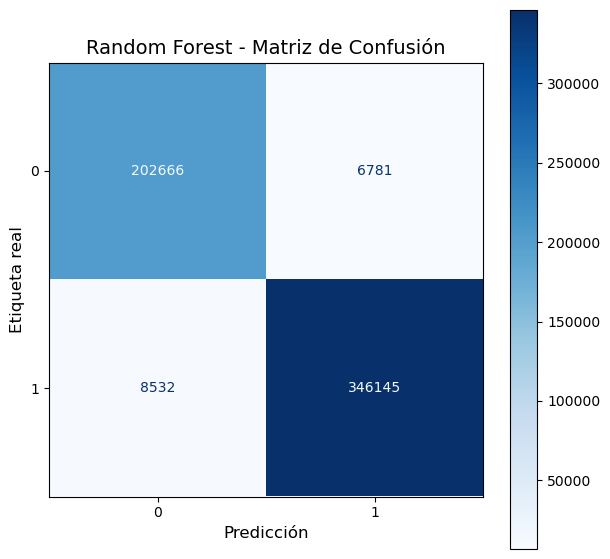

📋 Random Forest - Reporte de Clasificación:

              precision    recall  f1-score   support

           0     0.9596    0.9676    0.9636    209447
           1     0.9808    0.9759    0.9784    354677

    accuracy                         0.9729    564124
   macro avg     0.9702    0.9718    0.9710    564124
weighted avg     0.9729    0.9729    0.9729    564124



In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predecir
y_pred_rf = modelo_rf.predict(X_test)

# Matriz
cm = confusion_matrix(y_test, y_pred_rf)

# Mostrar sin notación científica
import numpy as np
np.set_printoptions(suppress=True)

# Plot con estilo y etiquetas claras
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(7, 7))
disp.plot(
    cmap='Blues',
    values_format='d',  # para que no use notación científica
    ax=ax
)
plt.title("Random Forest - Matriz de Confusión", fontsize=14)
plt.xlabel("Predicción", fontsize=12)
plt.ylabel("Etiqueta real", fontsize=12)
plt.grid(False)
plt.show()

# Reporte bonito
print("📋 Random Forest - Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred_rf, digits=4))

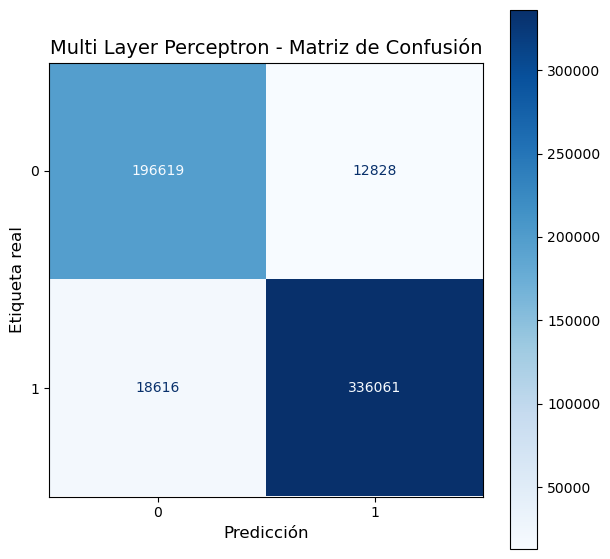

📋 Multi Layer Perceptron - Reporte de Clasificación:

              precision    recall  f1-score   support

           0     0.9135    0.9388    0.9260    209447
           1     0.9632    0.9475    0.9553    354677

    accuracy                         0.9443    564124
   macro avg     0.9384    0.9431    0.9406    564124
weighted avg     0.9448    0.9443    0.9444    564124



In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predecir
y_pred_rf = modelo_mlp.predict(X_test)

# Matriz
cm = confusion_matrix(y_test, y_pred_rf)

# Mostrar sin notación científica
import numpy as np
np.set_printoptions(suppress=True)

# Plot con estilo y etiquetas claras
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(7, 7))
disp.plot(
    cmap='Blues',
    values_format='d',  # para que no use notación científica
    ax=ax
)
plt.title("Multi Layer Perceptron - Matriz de Confusión", fontsize=14)
plt.xlabel("Predicción", fontsize=12)
plt.ylabel("Etiqueta real", fontsize=12)
plt.grid(False)
plt.show()

# Reporte bonito
print("📋 Multi Layer Perceptron - Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred_rf, digits=4))

### Comparativa MLP vrs Random forest

In [15]:
from sklearn.metrics import classification_report

# Sacar los reportes como diccionarios
reporte_rf = classification_report(y_test, modelo_rf.predict(X_test), output_dict=True)
reporte_mlp = classification_report(y_test, modelo_mlp.predict(X_test), output_dict=True)

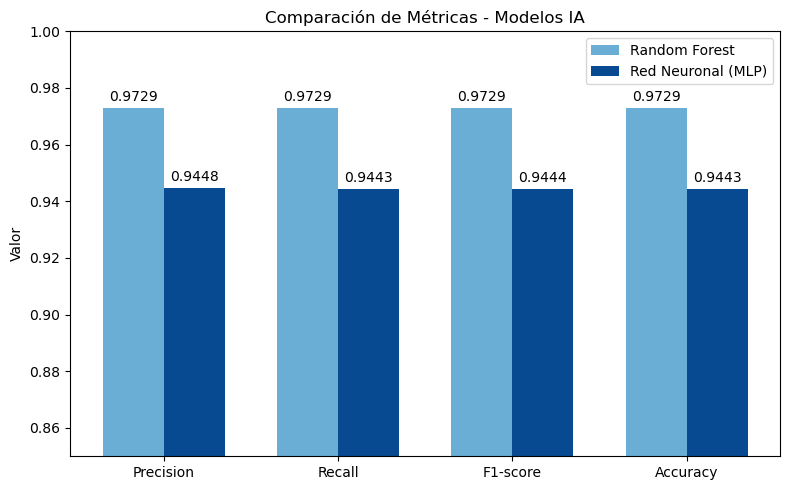

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Métricas
metricas = ['precision', 'recall', 'f1-score', 'accuracy']
rf_vals = [
    reporte_rf['weighted avg']['precision'],
    reporte_rf['weighted avg']['recall'],
    reporte_rf['weighted avg']['f1-score'],
    reporte_rf['accuracy']
]
mlp_vals = [
    reporte_mlp['weighted avg']['precision'],
    reporte_mlp['weighted avg']['recall'],
    reporte_mlp['weighted avg']['f1-score'],
    reporte_mlp['accuracy']
]

# Posiciones
x = np.arange(len(metricas))
width = 0.35

# Colores del colormap 'Blues'
colors = cm.Blues(np.linspace(0.5, 0.9, 2))  # 2 colores bonitos

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
b1 = ax.bar(x - width/2, rf_vals, width, label='Random Forest', color=colors[0])
b2 = ax.bar(x + width/2, mlp_vals, width, label='Red Neuronal (MLP)', color=colors[1])

# Detalles
ax.set_ylabel('Valor')
ax.set_title('Comparación de Métricas - Modelos IA')
ax.set_xticks(x)
ax.set_xticklabels([m.capitalize() for m in metricas])
ax.set_ylim(0.85, 1.00)
ax.legend()

# Etiquetas arriba de las barras
for bars in [b1, b2]:
    for bar in bars:
        h = bar.get_height()
        ax.annotate(f'{h:.4f}', xy=(bar.get_x() + bar.get_width()/2, h),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Utilizando el modelo Random forest para predecir una muestra de 100 estudiantes 

In [ ]:
# Cargar el original si aún no está
df_original = pd.read_csv('desercion_escolar_limpio.csv')

In [53]:
# Obtener las probabilidades de deserción (clase 1)
probas = modelo_rf.predict_proba(X_test)[:, 1]
# Crear DataFrame con los features + probabilidad
df_resultados = X_test.copy()
df_resultados['prob_desercion'] = probas
df_resultados['etiqueta_real'] = y_test.values
df_resultados['prediccion'] = modelo_rf.predict(X_test)

# Muestra aleatoria de 100
muestra_100 = df_resultados.sample(2000, random_state=42)

# Ordenar por riesgo descendente si querés
muestra_100 = muestra_100.sort_values(by='prob_desercion', ascending=False)

# Unir usando los índices
muestra_100_random = df_original.loc[muestra_100.index].copy()

# Agregar las columnas de riesgo, predicción y etiqueta
muestra_100_random['prob_desercion'] = muestra_100['prob_desercion']
muestra_100_random['prediccion'] = muestra_100['prediccion']
muestra_100_random['etiqueta_real'] = muestra_100['etiqueta_real']

In [54]:
display(muestra_100_random)

,nombre_estudiante,municipio,institucion_educativa,grado,promedio_notas,inasistencias,edad,estrato_socioeconomico,repitencia,jornada_escolar,subsidios,estado_emocional,tasa_desercion_municipal,deserta,prob_desercion,prediccion,etiqueta_real
2025118,Estudiante_918,Tuluá,Institución Educativa 16,Grado 9,2.34,8,15,4,0,tarde,1,bueno,2.57,1,1.00,1,1
2047046,Estudiante_385,Buga,Institución Educativa 4,Grado 10,4.83,5,16,2,0,tarde,1,malo,4.02,1,1.00,1,1
2518278,Estudiante_693,Buenaventura,Institución Educativa 13,Grado 7,2.52,4,13,2,0,completa,0,bueno,5.19,1,1.00,1,1
1992395,Estudiante_612,Tuluá,Institución Educativa 10,Grado 9,2.98,3,12,2,0,tarde,0,bueno,6.11,1,1.00,1,1
2654465,Estudiante_213,Palmira,Institución Educativa 11,Grado 9,4.56,7,15,1,1,completa,0,bueno,2.88,1,1.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673424,Estudiante_984,Cali,Institución Educativa 13,Grado 10,4.96,6,15,3,0,completa,1,regular,4.41,0,0.00,0,0
2477693,Estudiante_987,Buga,Institución Educativa 7,Grado 10,4.61,4,14,3,0,tarde,1,regular,6.93,0,0.00,0,0
1253548,Estudiante_883,Palmira,Institución Educativa 2,Grado 10,4.96,6,16,1,0,completa,1,bueno,3.90,0,0.00,0,0
2422108,Estudiante_250,Palmira,Institución Educativa 8,Grado 10,4.99,6,12,1,0,tarde,0,regular,6.82,0,0.00,0,0


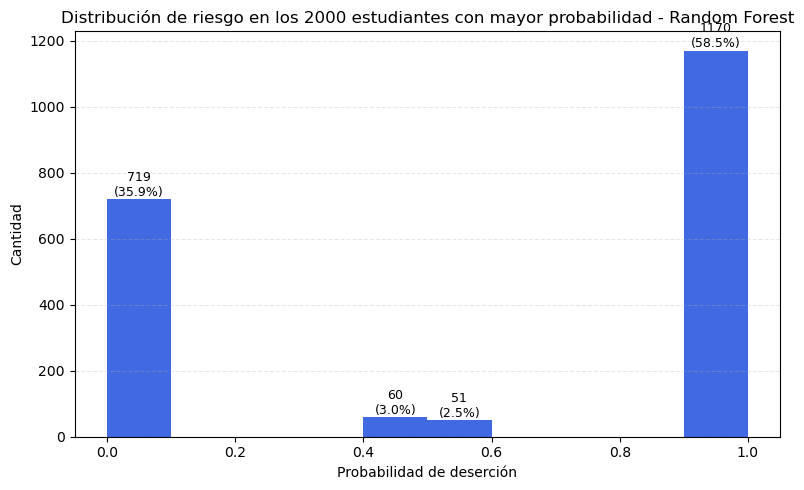

In [71]:
# Crear histograma y capturar valores
fig, ax = plt.subplots(figsize=(8, 5))
n, bins, patches = ax.hist(muestra_100_random['prob_desercion'], bins=10, color='royalblue')

# Calcular porcentajes
total = int(n.sum())
porcentajes = (n / total) * 100

# Etiquetas centradas en cada barra
for i in range(len(patches)):
    bar = patches[i]
    h = n[i]
    p = porcentajes[i]
    if h > 0:
        ax.text(bar.get_x() + bar.get_width()/2,
                h + 1,
                f'{int(h)}\n({p:.1f}%)',
                ha='center', va='bottom', fontsize=9)

# Estética
ax.set_title("Distribución de riesgo en los 2000 estudiantes con mayor probabilidad - Random Forest")
ax.set_xlabel("Probabilidad de deserción")
ax.set_ylabel("Cantidad")
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_137/2903916195.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{int(h)} ({porcentajes[i]}%)', ha='center', va='bottom', fontsize=10)


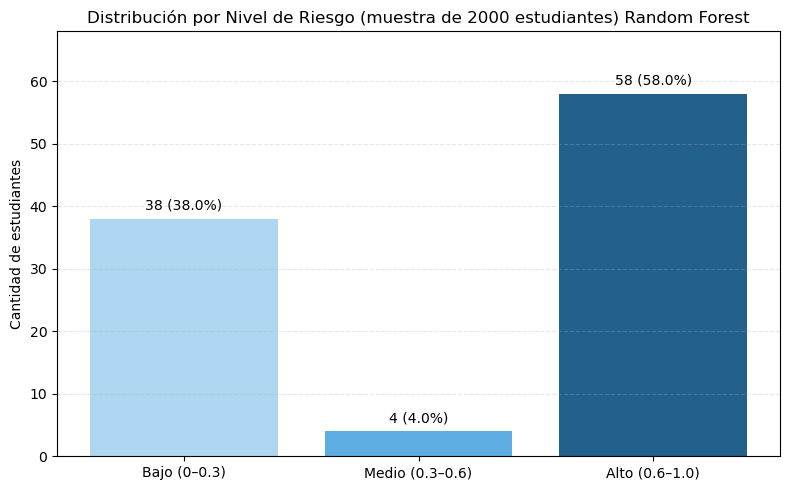

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir rangos de riesgo
bins = [0, 0.3, 0.6, 1.01]
labels = ['Bajo (0–0.3)', 'Medio (0.3–0.6)', 'Alto (0.6–1.0)']
muestra_100_random['rango_riesgo'] = pd.cut(muestra_100_full['prob_desercion'], bins=bins, labels=labels, include_lowest=True)

# Conteo por rango
conteo = muestra_100_random['rango_riesgo'].value_counts().sort_index()
porcentajes = (conteo / conteo.sum() * 100).round(2)

# Gráfica
colores = ['#AED6F1', '#5DADE2', '#21618C']
plt.figure(figsize=(8, 5))
bars = plt.bar(conteo.index, conteo.values, color=colores)

# Mostrar número + % arriba
for i, bar in enumerate(bars):
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 1,
             f'{int(h)} ({porcentajes[i]}%)', ha='center', va='bottom', fontsize=10)

plt.title("Distribución por Nivel de Riesgo (muestra de 2000 estudiantes) Random Forest")
plt.ylabel("Cantidad de estudiantes")
plt.ylim(0, max(conteo.values) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Utilizando el modelo MLP para predecir una muestra de 100 estudiantes

In [77]:
# Obtener las probabilidades de deserción (clase 1)
probas = modelo_mlp.predict_proba(X_test)[:, 1]
# Crear DataFrame con los features + probabilidad
df_resultados = X_test.copy()
df_resultados['prob_desercion'] = probas
df_resultados['etiqueta_real'] = y_test.values
df_resultados['prediccion'] = modelo_rf.predict(X_test)

# Muestra aleatoria de 100
muestra_100 = df_resultados.sample(2000, random_state=42)

# Ordenar por riesgo descendente si querés
muestra_100 = muestra_100.sort_values(by='prob_desercion', ascending=False)

# Unir usando los índices
muestra_100_mlp = df_original.loc[muestra_100.index].copy()

# Agregar las columnas de riesgo, predicción y etiqueta
muestra_100_mlp['prob_desercion'] = muestra_100['prob_desercion']
muestra_100_mlp['prediccion'] = muestra_100['prediccion']
muestra_100_mlp['etiqueta_real'] = muestra_100['etiqueta_real']

In [78]:
display(muestra_100_mlp)

,nombre_estudiante,municipio,institucion_educativa,grado,promedio_notas,inasistencias,edad,estrato_socioeconomico,repitencia,jornada_escolar,subsidios,estado_emocional,tasa_desercion_municipal,deserta,prob_desercion,prediccion,etiqueta_real
1569413,Estudiante_192,Buga,Institución Educativa 19,Grado 10,4.13,4,12,2,0,tarde,0,malo,3.50,1,1.00,1,1
1929277,Estudiante_380,Buga,Institución Educativa 3,Grado 10,4.63,7,15,2,1,completa,1,malo,4.21,1,1.00,1,1
2161997,Estudiante_218,Buenaventura,Institución Educativa 9,Grado 9,3.80,9,16,2,0,tarde,0,malo,4.06,1,1.00,1,1
2047046,Estudiante_385,Buga,Institución Educativa 4,Grado 10,4.83,5,16,2,0,tarde,1,malo,4.02,1,1.00,1,1
2552242,Estudiante_909,Tuluá,Institución Educativa 2,Grado 11,3.22,5,16,1,0,tarde,1,malo,6.44,1,1.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166629,Estudiante_950,Tuluá,Institución Educativa 10,Grado 11,4.65,9,12,3,0,completa,1,bueno,6.66,0,0.00,0,0
283478,Estudiante_823,Cali,Institución Educativa 16,Grado 11,3.35,9,13,1,0,tarde,0,regular,4.43,0,0.00,0,0
11709,Estudiante_334,Buga,Institución Educativa 1,Grado 11,3.39,9,12,2,0,completa,0,regular,5.03,0,0.00,0,0
2570293,Estudiante_334,Buga,Institución Educativa 1,Grado 11,3.39,9,12,2,0,completa,0,regular,5.03,0,0.00,0,0


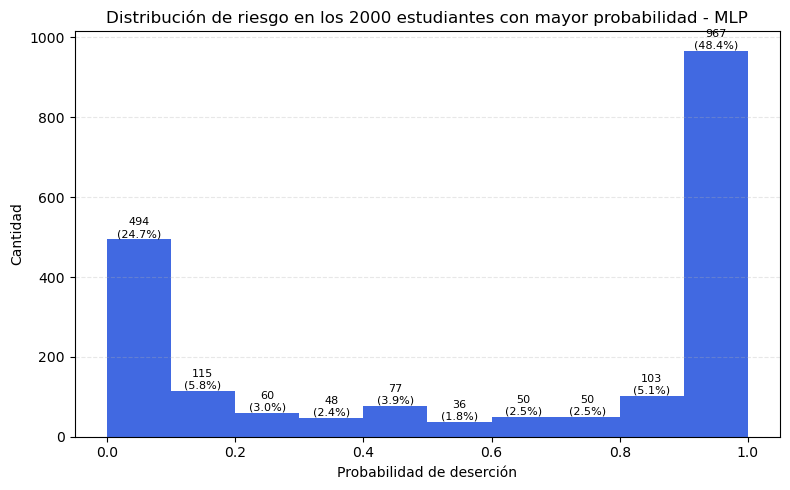

In [79]:
# Crear histograma y capturar valores
fig, ax = plt.subplots(figsize=(8, 5))
n, bins, patches = ax.hist(muestra_100_mlp['prob_desercion'], bins=10, color='royalblue')

# Calcular porcentajes
total = int(n.sum())
porcentajes = (n / total) * 100

# Etiquetas centradas en cada barra
for i in range(len(patches)):
    bar = patches[i]
    h = n[i]
    p = porcentajes[i]
    if h > 0:
        ax.text(bar.get_x() + bar.get_width()/2,
                h + 1,
                f'{int(h)}\n({p:.1f}%)',
                ha='center', va='bottom', fontsize=8)

# Estética
ax.set_title("Distribución de riesgo en los 2000 estudiantes con mayor probabilidad - MLP")
ax.set_xlabel("Probabilidad de deserción")
ax.set_ylabel("Cantidad")
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_137/4235081296.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{int(h)} ({porcentajes[i]}%)', ha='center', va='bottom', fontsize=10)


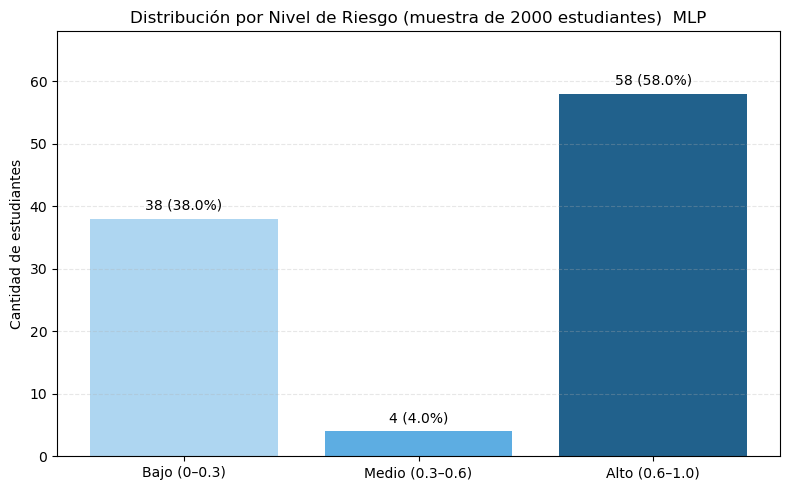

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir rangos de riesgo
bins = [0, 0.3, 0.6, 1.01]
labels = ['Bajo (0–0.3)', 'Medio (0.3–0.6)', 'Alto (0.6–1.0)']
muestra_100_mlp['rango_riesgo'] = pd.cut(muestra_100_full['prob_desercion'], bins=bins, labels=labels, include_lowest=True)

# Conteo por rango
conteo = muestra_100_mlp['rango_riesgo'].value_counts().sort_index()
porcentajes = (conteo / conteo.sum() * 100).round(2)

# Gráfica
colores = ['#AED6F1', '#5DADE2', '#21618C']
plt.figure(figsize=(8, 5))
bars = plt.bar(conteo.index, conteo.values, color=colores)

# Mostrar número + % arriba
for i, bar in enumerate(bars):
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 1,
             f'{int(h)} ({porcentajes[i]}%)', ha='center', va='bottom', fontsize=10)

plt.title("Distribución por Nivel de Riesgo (muestra de 2000 estudiantes)  MLP")
plt.ylabel("Cantidad de estudiantes")
plt.ylim(0, max(conteo.values) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [82]:
!pip install openpyxl

In [84]:
# Guardar predicciones
import openpyxl
muestra_100_random.to_excel("predicciones_rf.xlsx", index=True)
muestra_100_mlp.to_excel("predicciones_mlp.xlsx", index=True)

In [85]:
muestra_100_random.to_csv("predicciones_rf.csv", index=True)
muestra_100_mlp.to_csv("predicciones_mlp.csv", index=True)